In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# **Number of Attributes**

**height**:   integer.         | Height of the block.

**length**:   integer.     | Length of the block. 

**area**:     integer.    | Area of the block (height * lenght);

**eccen**:    continuous.  | Eccentricity of the block (lenght / height);

**p_black**:  continuous.  | Percentage of black pixels within the block (blackpix / area);

**p_and**:    continuous.        | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area);

**mean_tr**:  continuous.      | Mean number of white-black transitions (blackpix / wb_trans);

**blackpix**: integer.    | Total number of black pixels in the original bitmap of the block.

**blackand**: integer.        | Total number of black pixels in the bitmap of the block after the RLSA.

**wb_trans**: integer.          | Number of white-black transitions in the original bitmap of the block.

In [ ]:
data = pd.read_csv('page-blocks.data', delimiter= "\s+",header = None)
columns = ['height','length','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans','class']
data.columns = columns
labels = data['class']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    5473 non-null   int64  
 1   length    5473 non-null   int64  
 2   area      5473 non-null   int64  
 3   eccen     5473 non-null   float64
 4   p_black   5473 non-null   float64
 5   p_and     5473 non-null   float64
 6   mean_tr   5473 non-null   float64
 7   blackpix  5473 non-null   int64  
 8   blackand  5473 non-null   int64  
 9   wb_trans  5473 non-null   int64  
 10  class     5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


# **Correspondance des classes**

1 = text

2 = horiz. line

3 = graphic

4 = vert. line

5 = picture

In [ ]:
labels.value_counts()

1    4913
2     329
5     115
4      88
3      28
Name: class, dtype: int64

In [ ]:
data[data.columns[:-1]].describe()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000


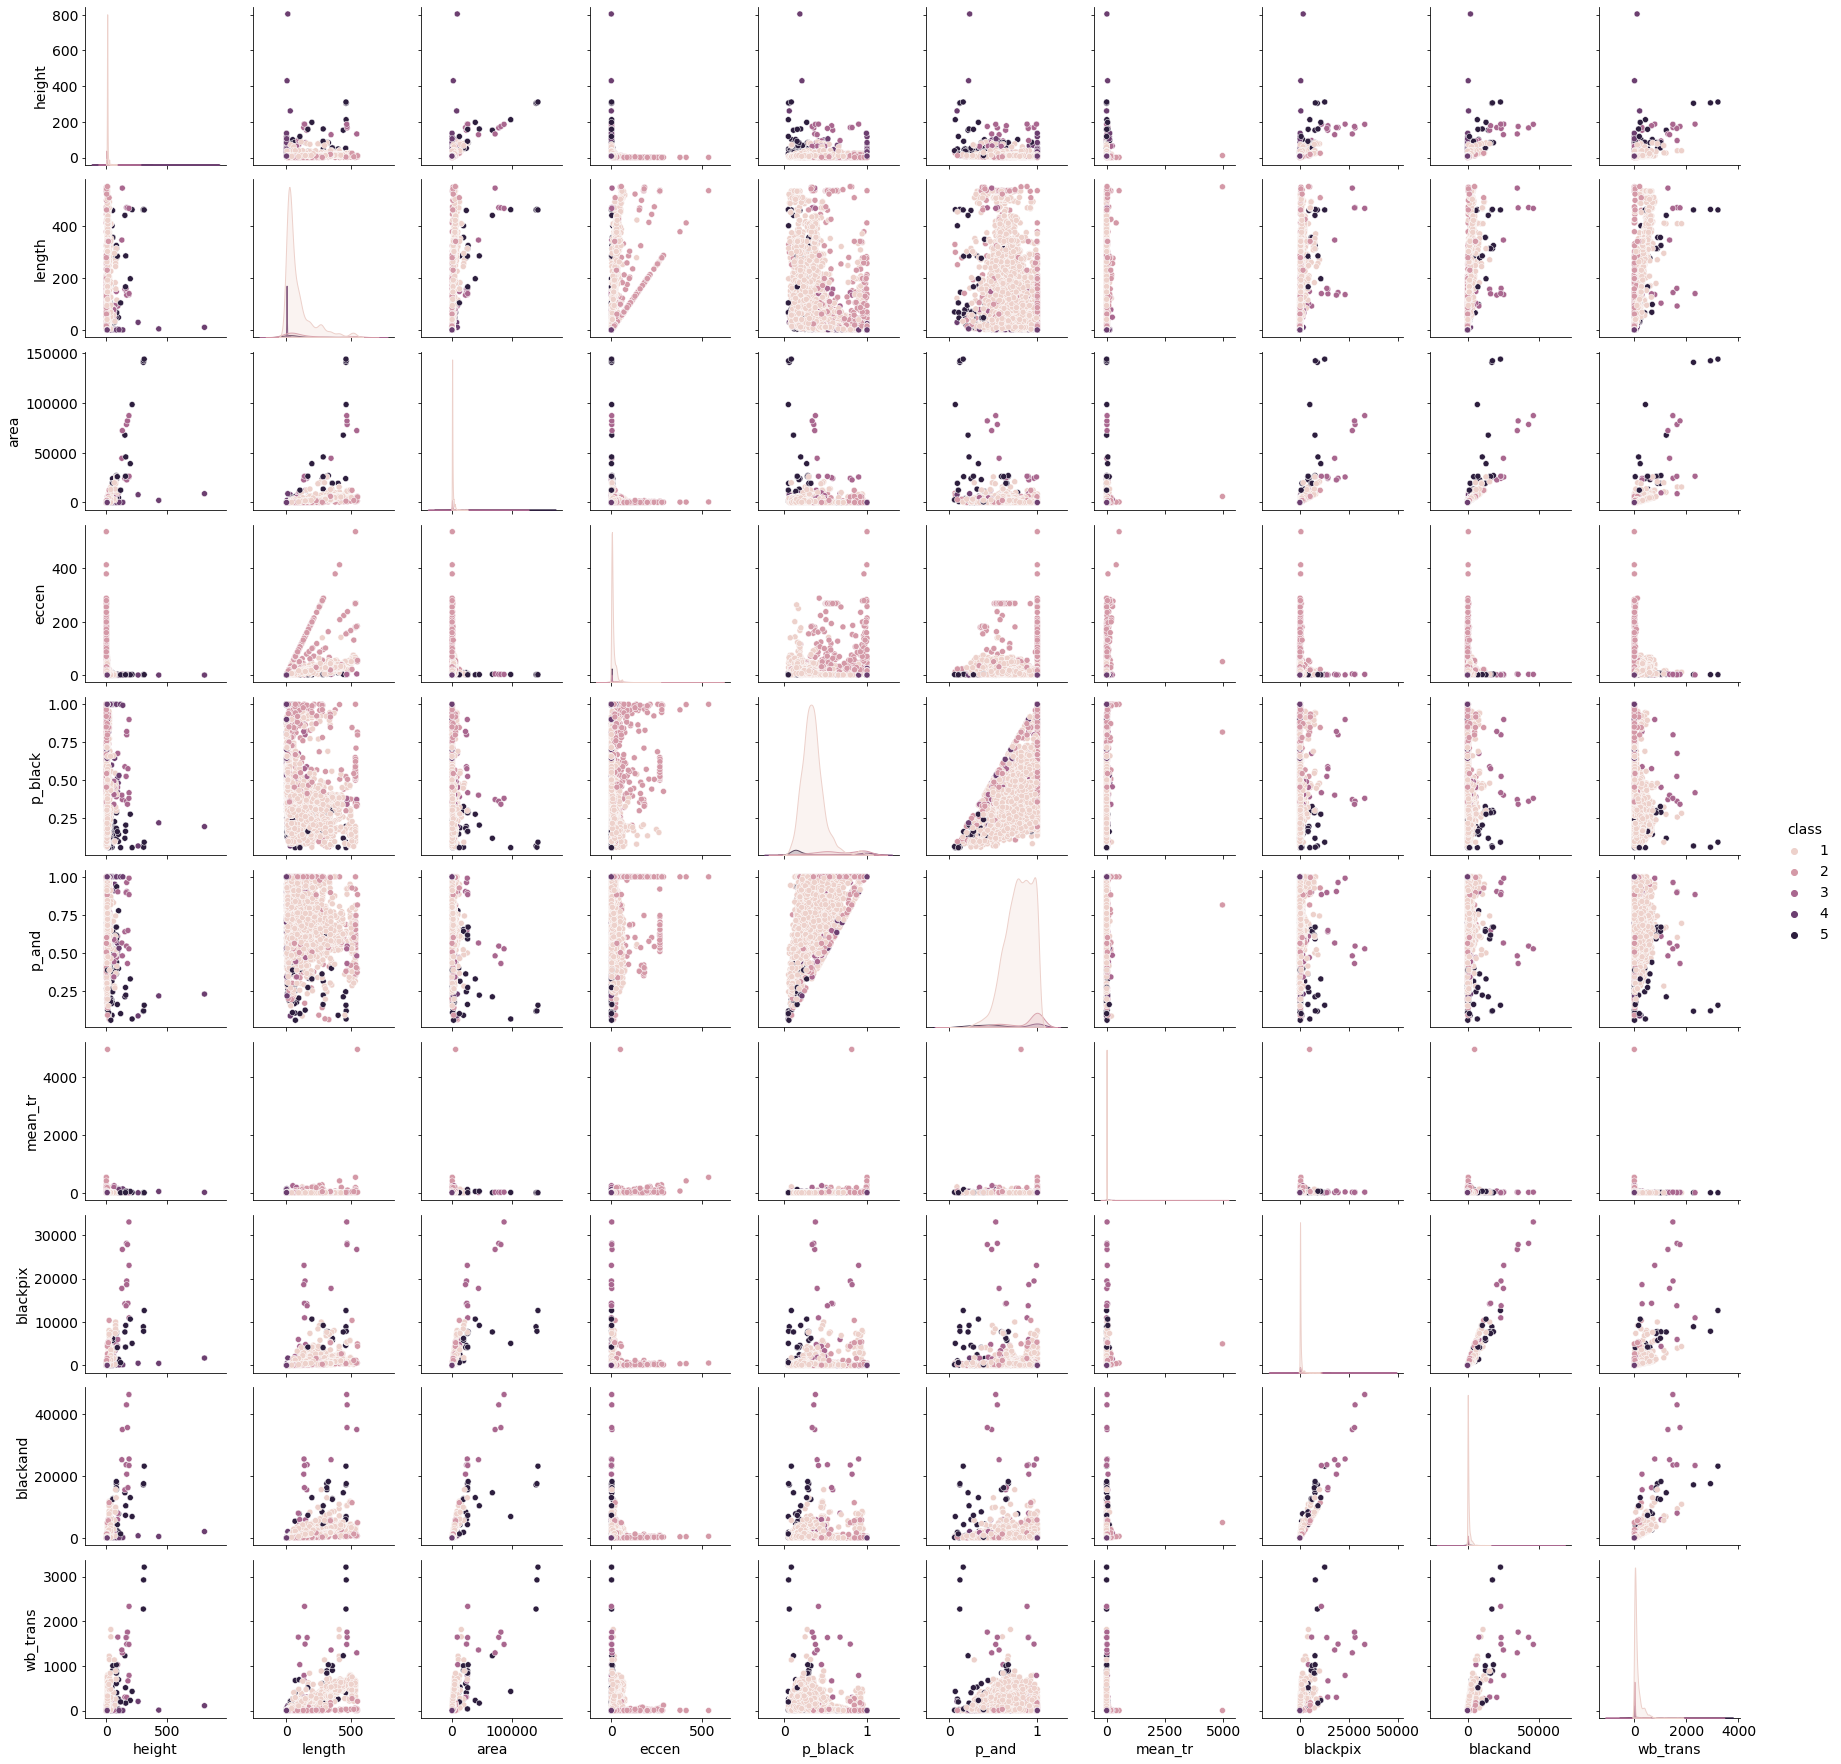

In [ ]:
sns.pairplot(data,hue="class")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data[data.columns[:-1]])
data_scaled = scaler.transform(data[data.columns[:-1]])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = columns[:-1]
data_scaled['class'] = data['class']
data_scaled

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,-0.288690,-0.719792,-0.239930,-0.402397,0.176423,-0.750401,-0.056307,-0.277063,-0.381702,-0.601716,1
1,-0.235945,-0.719792,-0.238487,-0.409987,0.339583,0.562261,-0.037921,-0.273914,-0.374260,-0.607693,1
2,-0.235945,-0.623899,-0.224875,-0.350282,-0.459335,-0.258153,-0.025904,-0.263680,-0.351404,-0.595738,1
3,-0.288690,-0.719792,-0.239930,-0.402397,0.013264,-0.246432,-0.027352,-0.277851,-0.380107,-0.619648,1
4,-0.235945,-0.754662,-0.243436,-0.431713,0.739041,0.931447,-0.057465,-0.281000,-0.384891,-0.613671,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,-0.341436,3.787176,0.185112,3.818973,0.975341,-1.066846,0.497312,0.606250,0.277937,-0.470210,2
5469,-0.183199,-0.745944,-0.241374,-0.429400,1.943044,0.843545,0.054735,-0.272340,-0.380107,-0.625626,1
5470,-0.235945,0.047352,-0.129597,0.067719,-0.386195,0.738064,-0.066296,-0.153463,-0.118059,-0.015918,1
5471,-0.183199,-0.423396,-0.187960,-0.257223,-0.875672,0.093453,-0.070350,-0.240062,-0.271674,-0.368592,1


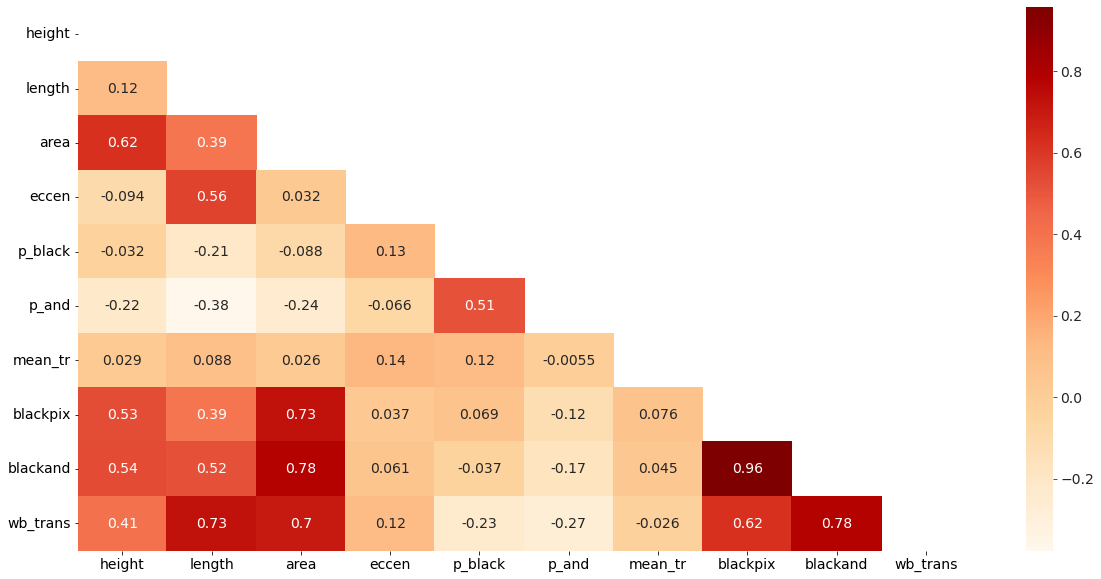

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))

corrMatrix = data[data.columns[:-1]].corr()

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(corrMatrix, mask = mask,annot=True,  cmap = "OrRd")

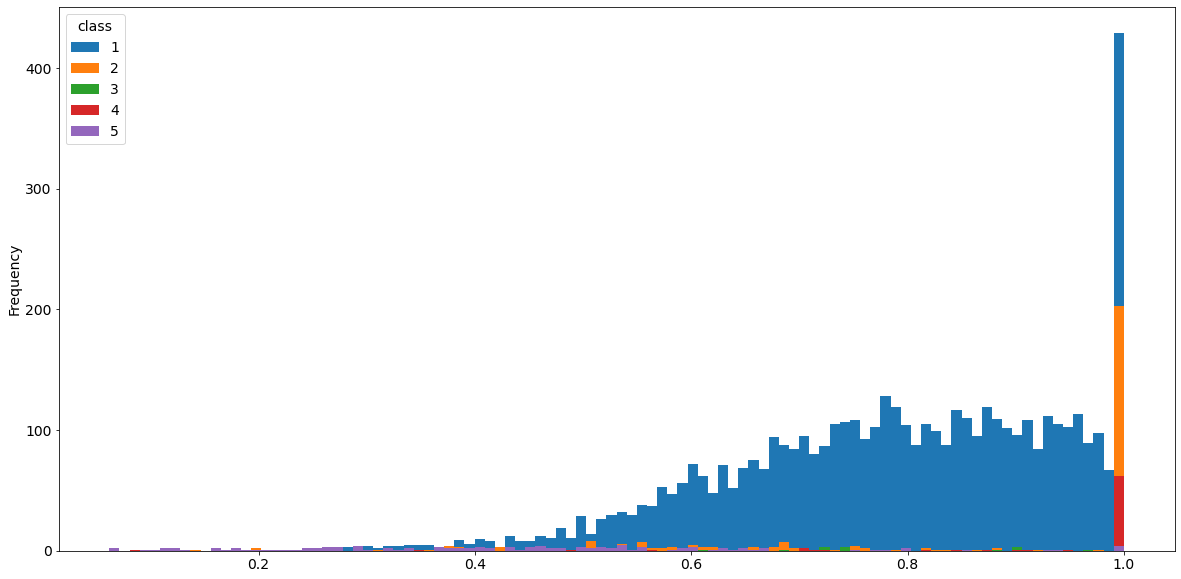

In [ ]:
data.pivot(columns="class", values="p_and").plot.hist(bins=100,figsize=(20,10))

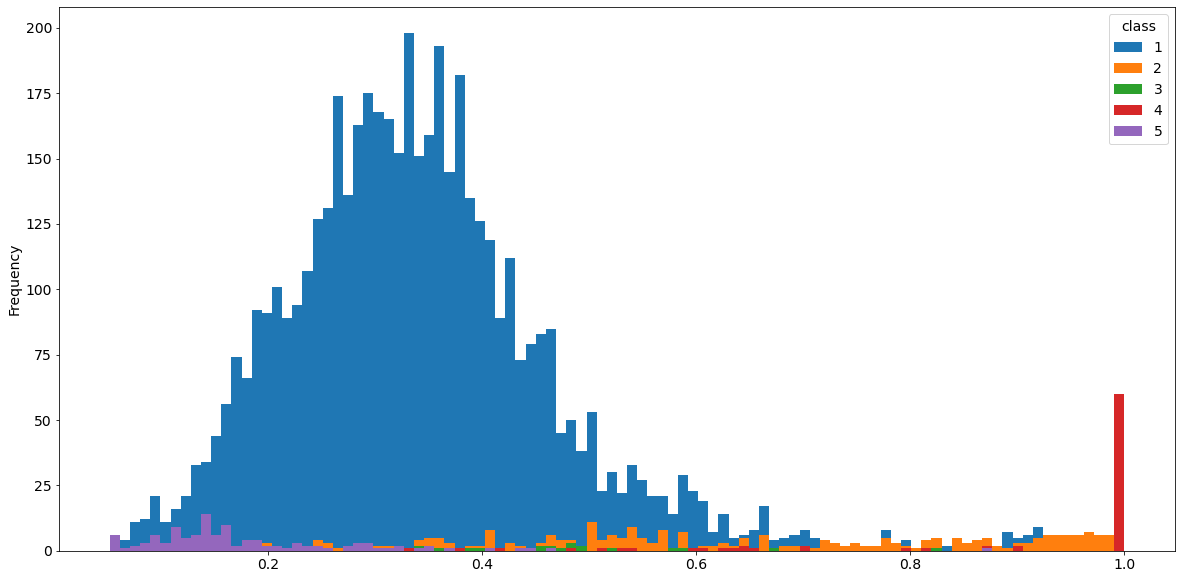

In [ ]:
data.pivot(columns="class", values="p_black").plot.hist(bins=100,figsize=(20,10))

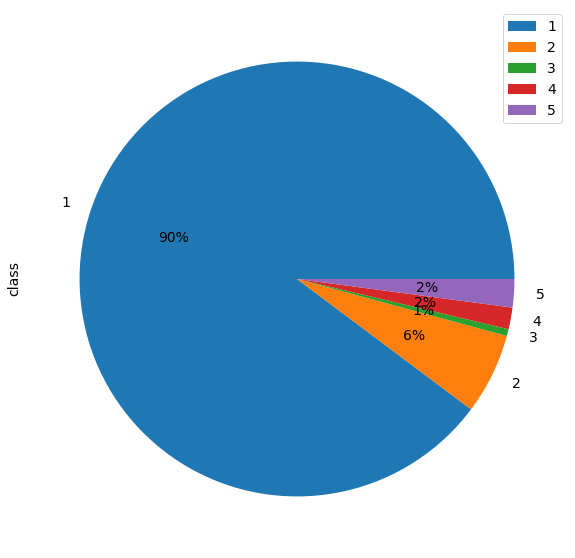

In [ ]:
data.groupby(['class']).count().plot(kind='pie', y='height', ylabel="class",figsize=(20,10),autopct='%.0f%%')

# **PCA** 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle')
pca.fit(data_scaled[data_scaled.columns[:-1]])

PCA(n_components='mle')

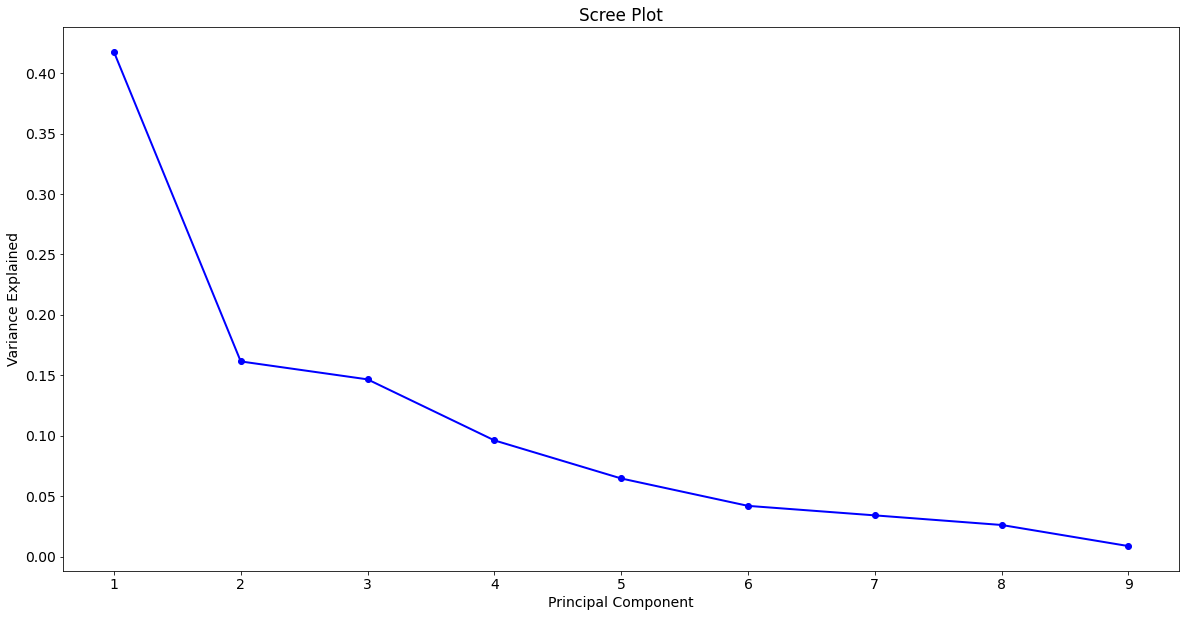

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_*100)

[41.75211764 16.15749694 14.6737436   9.62848581  6.4793304   4.21322005
  3.42749133  2.63232777  0.88702434]


In [ ]:
pca_data = pca.transform(data_scaled[data_scaled.columns[:-1]])
pca_df = pd.DataFrame(data = pca_data, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC 7','PC 8','PC 9'])
pca_df['class'] = labels
pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,class
0,-0.889061,-0.060631,-0.582623,0.361692,0.325805,-0.746064,-0.055617,-0.223607,0.147920,1
1,-1.127953,0.702117,-0.138229,0.000601,-0.070463,0.001957,0.088779,-0.126729,-0.050330,1
2,-0.842229,-0.171851,-0.676499,0.299488,0.010323,-0.154815,0.343971,-0.123840,0.016335,1
3,-0.974479,0.111120,-0.504140,0.262806,0.101629,-0.374768,0.122108,-0.182447,0.060883,1
4,-1.258248,1.109930,0.123551,-0.152079,-0.090586,0.056915,-0.046933,-0.130224,-0.084463,1
...,...,...,...,...,...,...,...,...,...,...
5468,1.857785,-2.598000,4.077666,-0.397671,1.525168,-0.734562,0.282483,0.259079,-1.442518,2
5469,-1.324493,1.704750,0.695946,-0.134482,0.266008,-0.464537,-0.665536,-0.182768,-0.058107,1
5470,-0.335483,-0.015338,0.123128,-0.288890,-0.438021,0.568757,0.277139,0.037719,-0.099750,1
5471,-0.622024,-0.305952,-0.671948,0.128887,-0.248417,0.304238,0.507790,-0.030680,-0.017029,1


In [ ]:
map_color={
    1:'red',
    2:'blue',
    3:'green',
    4:'black',
    5:'orange'
}

pca_df['color'] = pca_df['class'].map(map_color)

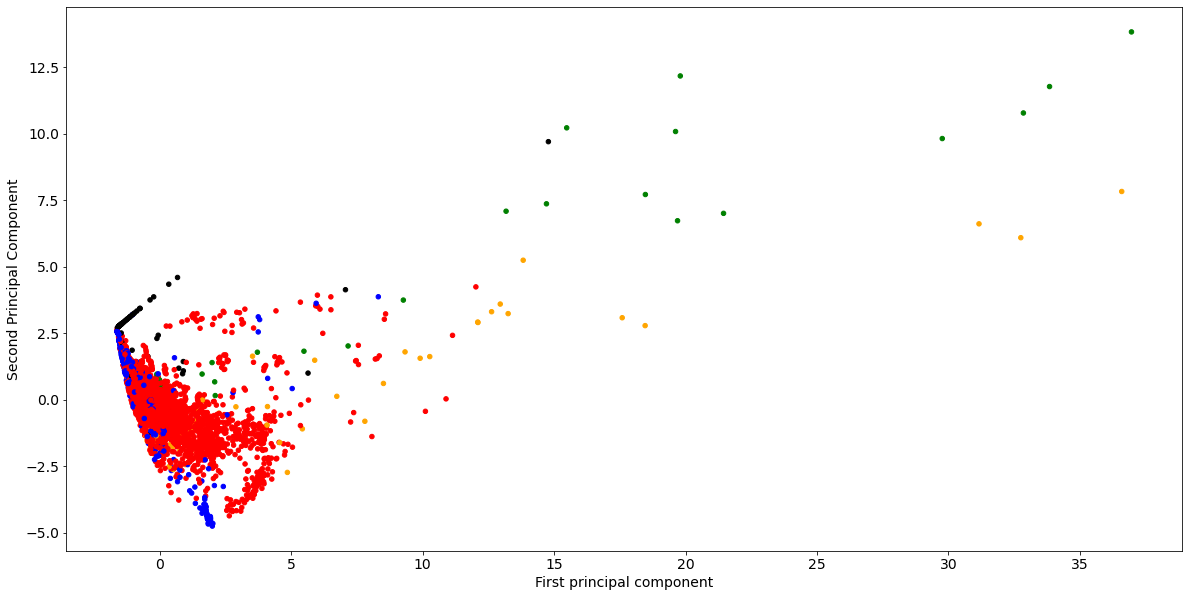

In [ ]:
pca_df.plot.scatter(x='PC 1', y='PC 2',c='color',figsize=(20,10))
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

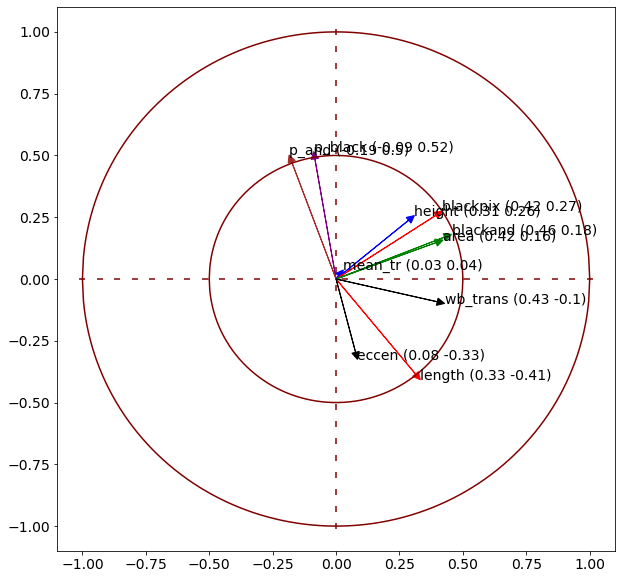

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca.components_[0]) > 6:
    colors=colors*(int(len(pca.components_[0])/6)+1)

add_string=""
for i in range(len(pca.components_[0])):
    xi=pca.components_[0][i]
    yi=pca.components_[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca.components_[0, i], 
             pca.components_[1, i] , 
             s=data.columns[i] + add_string )

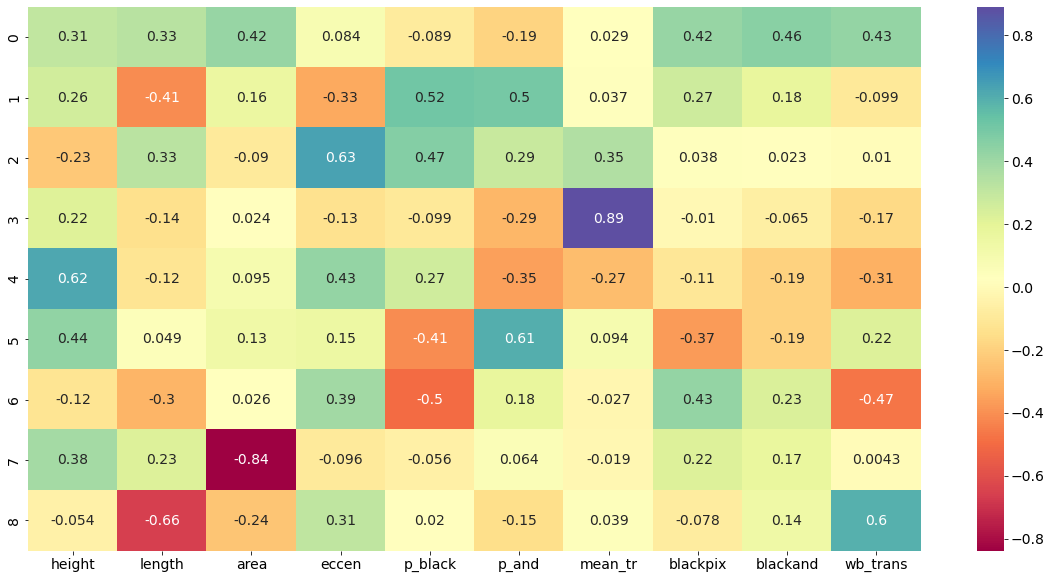

In [ ]:
map_PCA= pd.DataFrame(pca.components_,columns=columns[:-1])
plt.figure(figsize=(20,10))
sns.heatmap(map_PCA,annot=True,cmap="Spectral")

In [ ]:
data_reduce_scaled = data_scaled[['height','length','area','eccen','p_and','mean_tr','blackand','wb_trans','class']]
data_reduce_scaled

,height,length,area,eccen,p_and,mean_tr,blackand,wb_trans,class
0,-0.288690,-0.719792,-0.239930,-0.402397,-0.750401,-0.056307,-0.381702,-0.601716,1
1,-0.235945,-0.719792,-0.238487,-0.409987,0.562261,-0.037921,-0.374260,-0.607693,1
2,-0.235945,-0.623899,-0.224875,-0.350282,-0.258153,-0.025904,-0.351404,-0.595738,1
3,-0.288690,-0.719792,-0.239930,-0.402397,-0.246432,-0.027352,-0.380107,-0.619648,1
4,-0.235945,-0.754662,-0.243436,-0.431713,0.931447,-0.057465,-0.384891,-0.613671,1
...,...,...,...,...,...,...,...,...,...
5468,-0.341436,3.787176,0.185112,3.818973,-1.066846,0.497312,0.277937,-0.470210,2
5469,-0.183199,-0.745944,-0.241374,-0.429400,0.843545,0.054735,-0.380107,-0.625626,1
5470,-0.235945,0.047352,-0.129597,0.067719,0.738064,-0.066296,-0.118059,-0.015918,1
5471,-0.183199,-0.423396,-0.187960,-0.257223,0.093453,-0.070350,-0.271674,-0.368592,1


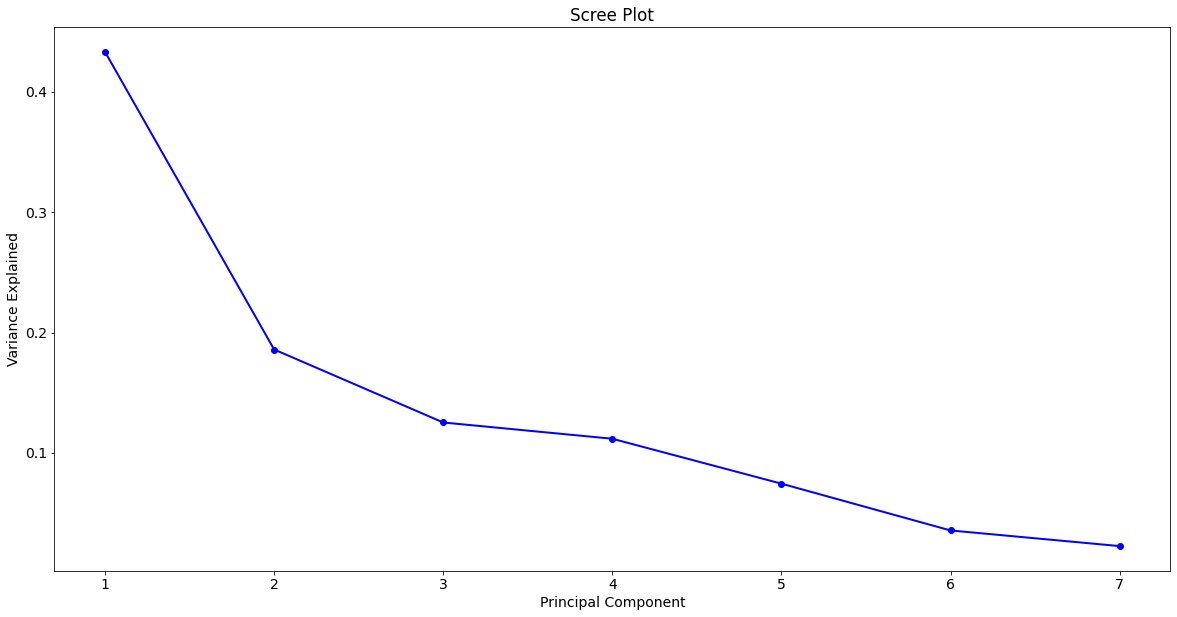

array([0.43313212, 0.18595169, 0.12533385, 0.11182524, 0.07451852,
       0.03565973, 0.02266919])

In [ ]:
pca_reduce = PCA(n_components = 'mle')
pca_reduce.fit(data_reduce_scaled[data_reduce_scaled.columns[:-1]])

fig, ax = plt.subplots(figsize=(20,10))
PC_values = np.arange(pca_reduce.n_components_) + 1
plt.plot(PC_values, pca_reduce.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

pca_reduce.explained_variance_ratio_

In [ ]:
pca_reduce_data = pca_reduce.transform(data_reduce_scaled[data_reduce_scaled.columns[:-1]])
pca_reduce_data = pd.DataFrame(data = pca_reduce_data, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC 7'])
pca_reduce_data['class'] = data_reduce_scaled['class']
pca_reduce_data

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,class
0,-0.846262,-0.316415,-0.221891,0.915398,-0.046183,-0.391484,-0.144338,1
1,-1.120635,-0.498821,0.200461,-0.234299,0.012774,-0.150991,0.014529,1
2,-0.868951,-0.317006,-0.046129,0.472286,0.001598,-0.273734,-0.089632,1
3,-0.965628,-0.371195,-0.041956,0.479010,-0.033647,-0.313531,-0.087202,1
4,-1.230364,-0.576590,0.297615,-0.557305,0.022829,-0.095092,0.062013,1
...,...,...,...,...,...,...,...,...
5468,2.106884,4.698198,-0.318263,0.121014,1.379284,-0.089520,-0.269329,2
5469,-1.188229,-0.557665,0.383622,-0.441390,0.033637,-0.083582,0.050498,1
5470,-0.341151,0.108654,0.092051,-0.685759,-0.075221,0.105352,0.113887,1
5471,-0.676245,-0.249513,-0.013175,0.072487,-0.018506,-0.110792,-0.007370,1


In [ ]:
map_color={
    1:'red',
    2:'blue',
    3:'green',
    4:'black',
    5:'orange'
}

pca_reduce_data['color'] = pca_reduce_data['class'].map(map_color)

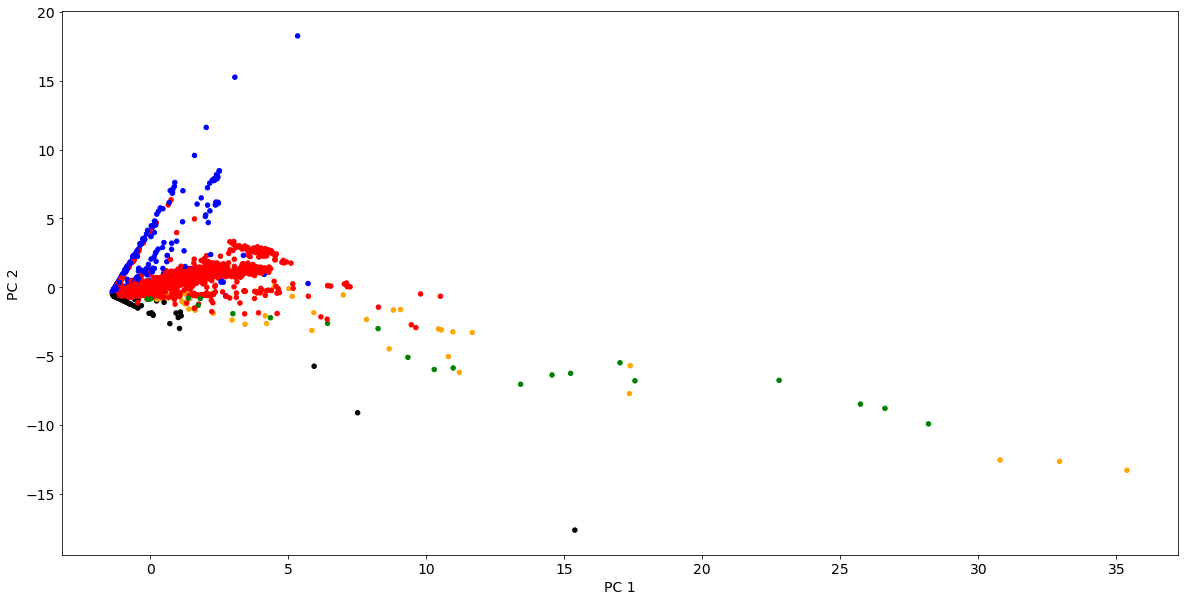

In [ ]:
pca_reduce_data.plot.scatter(x='PC 1', y='PC 2',c='color',figsize=(20,10))

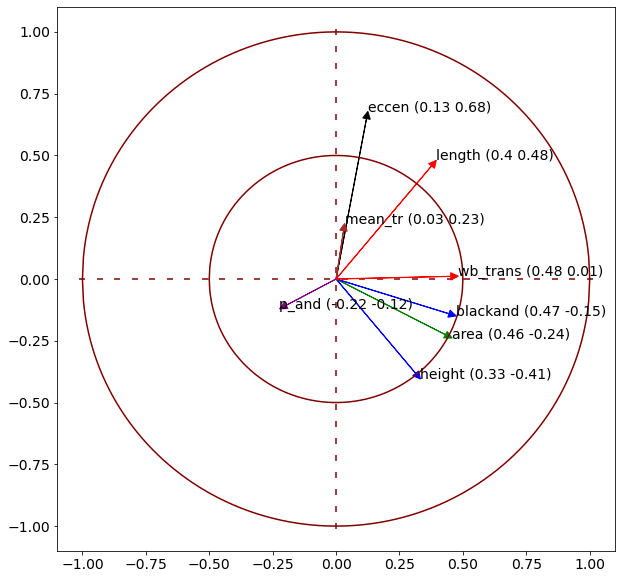

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_reduce.components_[0]) > 6:
    colors=colors*(int(len(pca_reduce.components_[0])/6)+1)

add_string=""
for i in range(len(pca_reduce.components_[0])):
    xi=pca_reduce.components_[0][i]
    yi=pca_reduce.components_[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_reduce.components_[0, i], 
             pca_reduce.components_[1, i] , 
             s=data_reduce_scaled.columns[i] + add_string )

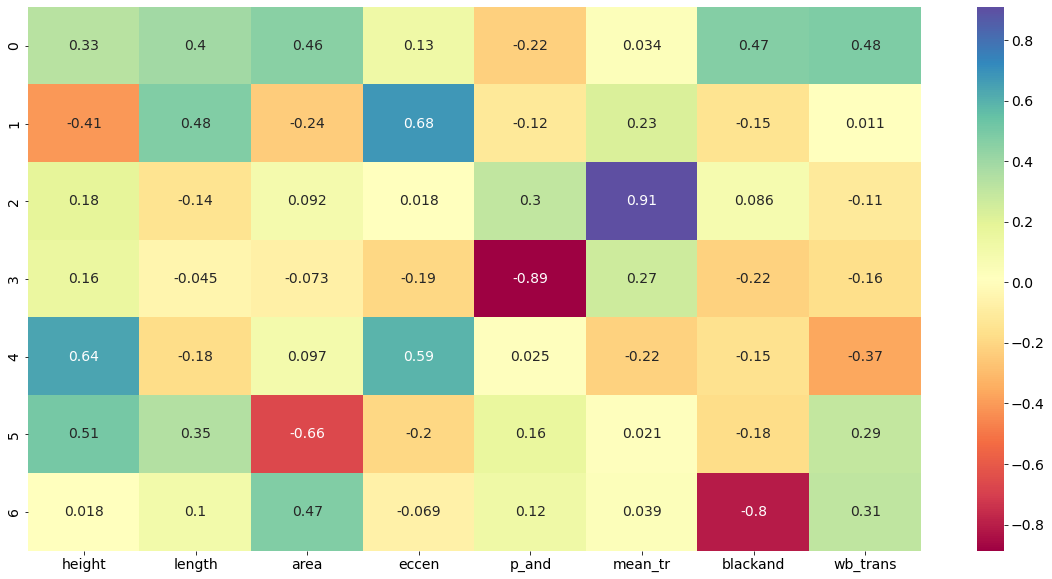

In [ ]:
map_pca_reduce= pd.DataFrame(pca_reduce.components_,columns=['height','length','area','eccen','p_and','mean_tr','blackand','wb_trans'])
plt.figure(figsize=(20,10))
sns.heatmap(map_pca_reduce,annot=True,cmap="Spectral")

In [ ]:
data_reduce_scaled2 = data_scaled[['height','length','eccen','p_and','blackand','wb_trans','class']]
data_reduce_scaled2

,height,length,eccen,p_and,blackand,wb_trans,class
0,-0.288690,-0.719792,-0.402397,-0.750401,-0.381702,-0.601716,1
1,-0.235945,-0.719792,-0.409987,0.562261,-0.374260,-0.607693,1
2,-0.235945,-0.623899,-0.350282,-0.258153,-0.351404,-0.595738,1
3,-0.288690,-0.719792,-0.402397,-0.246432,-0.380107,-0.619648,1
4,-0.235945,-0.754662,-0.431713,0.931447,-0.384891,-0.613671,1
...,...,...,...,...,...,...,...
5468,-0.341436,3.787176,3.818973,-1.066846,0.277937,-0.470210,2
5469,-0.183199,-0.745944,-0.429400,0.843545,-0.380107,-0.625626,1
5470,-0.235945,0.047352,0.067719,0.738064,-0.118059,-0.015918,1
5471,-0.183199,-0.423396,-0.257223,0.093453,-0.271674,-0.368592,1


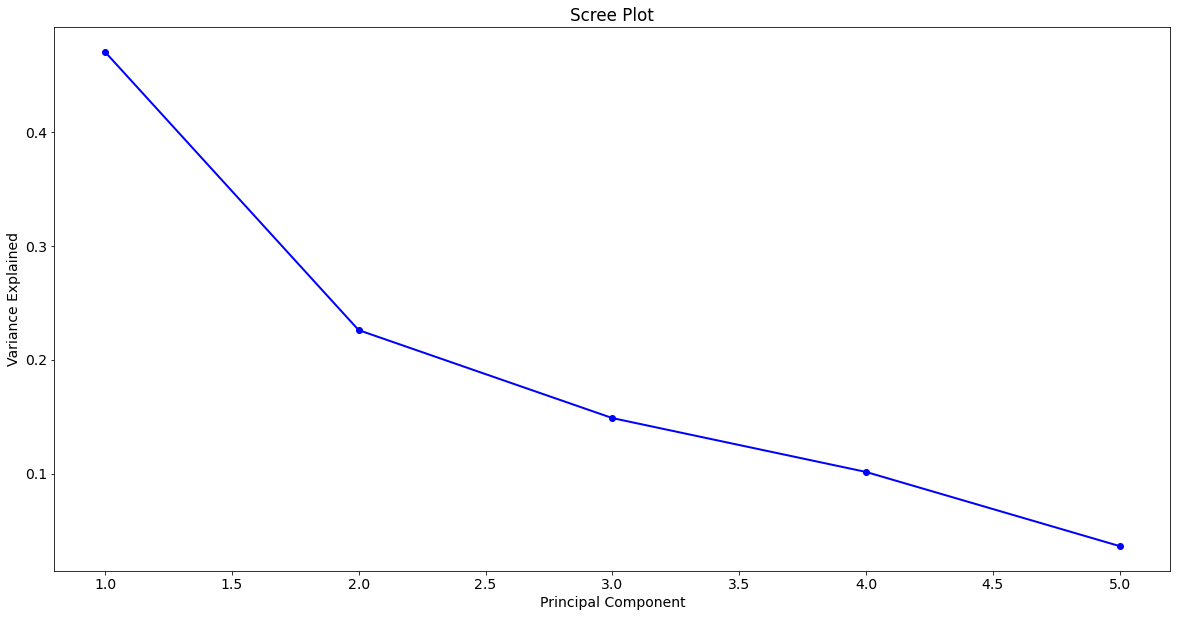

array([0.47055991, 0.22614733, 0.14890024, 0.10157331, 0.03643272])

In [ ]:
pca_reduce2 = PCA(n_components = 'mle')
pca_reduce2.fit(data_reduce_scaled2[data_reduce_scaled2.columns[:-1]])

fig, ax = plt.subplots(figsize=(20,10))
PC_values = np.arange(pca_reduce2.n_components_) + 1
plt.plot(PC_values, pca_reduce2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

pca_reduce2.explained_variance_ratio_

In [ ]:
pca_reduce_data2 = pca_reduce2.transform(data_reduce_scaled2[data_reduce_scaled2.columns[:-1]])
pca_reduce_data2 = pd.DataFrame(data = pca_reduce_data2, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5'])
pca_reduce_data2['class'] = data_reduce_scaled2['class']
pca_reduce_data2

,PC 1,PC 2,PC 3,PC 4,PC 5,class
0,-0.837172,0.233571,-0.966143,-0.074177,-0.347743,1
1,-1.180038,0.321953,0.255204,0.005960,-0.073020,1
2,-0.878678,0.214940,-0.490777,-0.012528,-0.229317,1
3,-0.983781,0.253143,-0.499066,-0.050622,-0.253804,1
4,-1.311029,0.363048,0.591564,0.015921,-0.000729,1
...,...,...,...,...,...,...
5468,2.695041,-4.382894,-0.365390,1.308558,-0.112266,2
5469,-1.269283,0.381931,0.507661,0.054532,-0.007756,1
5470,-0.308408,-0.191051,0.670474,-0.098043,0.163674,1
5471,-0.678402,0.153229,-0.088320,-0.036314,-0.066480,1


In [ ]:
map_color={
    1:'red',
    2:'blue',
    3:'green',
    4:'black',
    5:'orange'
}

pca_reduce_data2['color'] = pca_reduce_data2['class'].map(map_color)

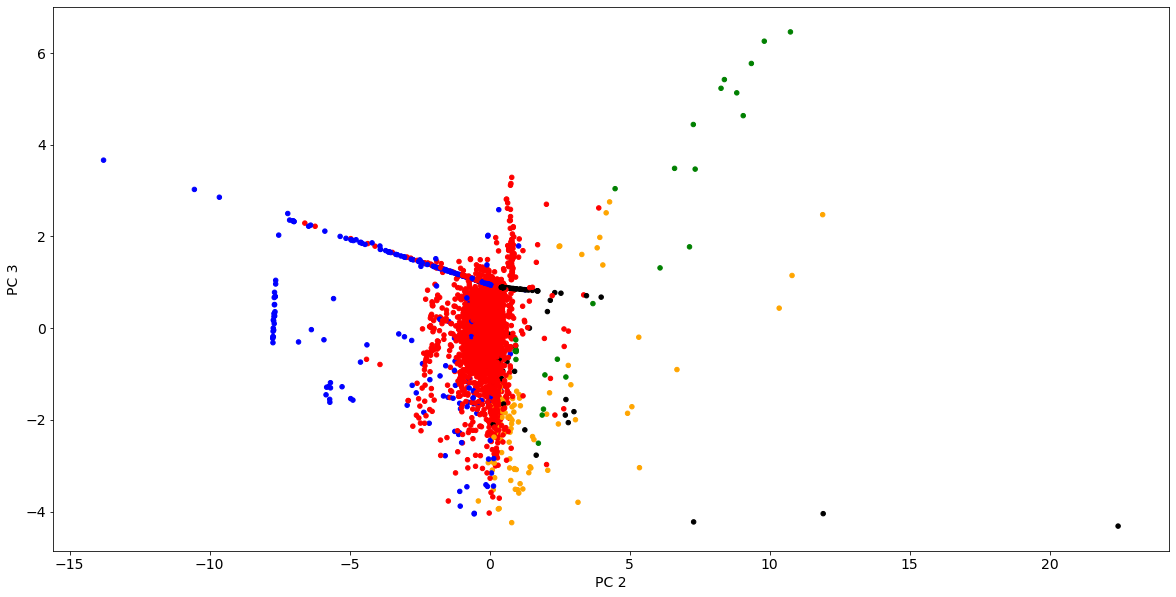

In [ ]:
pca_reduce_data2.plot.scatter(x='PC 2', y='PC 3',c='color',figsize=(20,10))

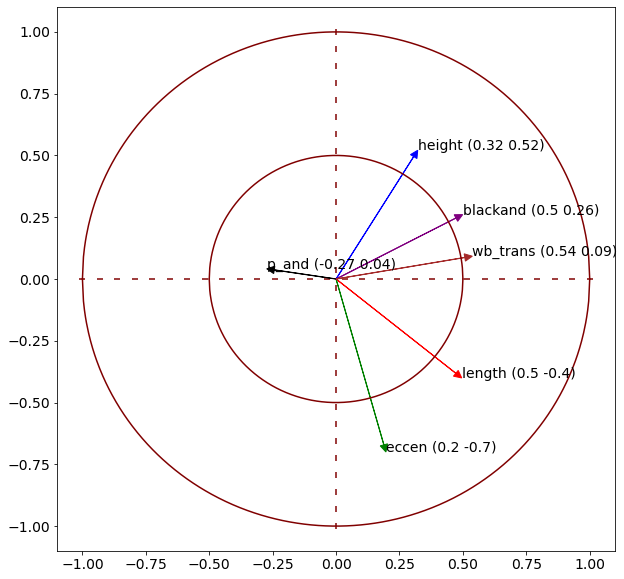

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_reduce2.components_[0]) > 6:
    colors=colors*(int(len(pca_reduce2.components_[0])/6)+1)

add_string=""
for i in range(len(pca_reduce2.components_[0])):
    xi=pca_reduce2.components_[0][i]
    yi=pca_reduce2.components_[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_reduce2.components_[0, i], 
             pca_reduce2.components_[1, i] , 
             s=data_reduce_scaled2.columns[i] + add_string )

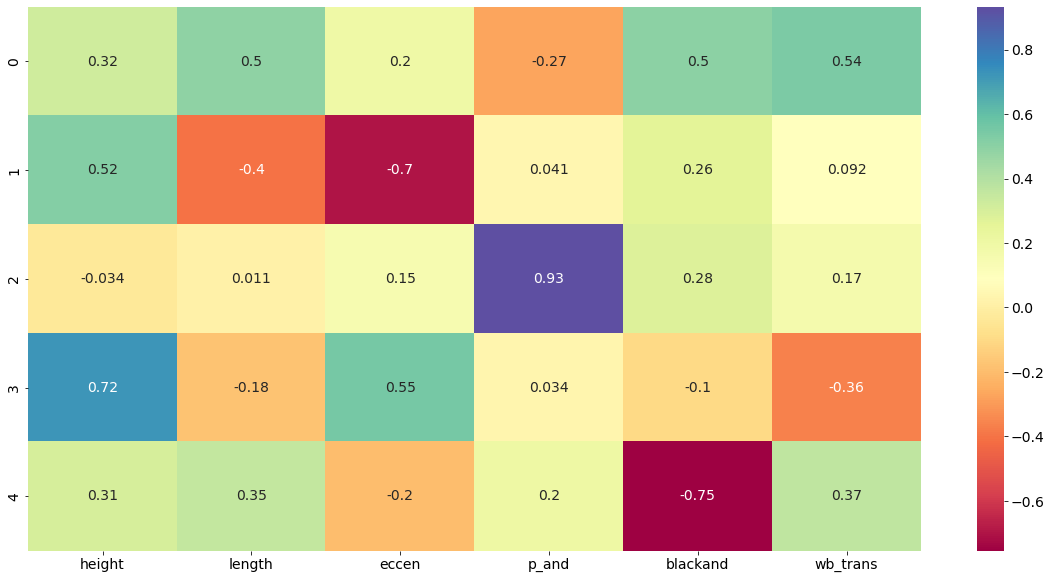

In [ ]:
map_pca_reduce2= pd.DataFrame(pca_reduce2.components_,columns=['height','length','eccen','p_and','blackand','wb_trans'])
plt.figure(figsize=(20,10))
sns.heatmap(map_pca_reduce2,annot=True,cmap="Spectral")

In [ ]:
data_reduce_scaled3 = data_scaled[['area','p_and','blackand','wb_trans','class']]
data_reduce_scaled3

,area,p_and,blackand,wb_trans,class
0,-0.239930,-0.750401,-0.381702,-0.601716,1
1,-0.238487,0.562261,-0.374260,-0.607693,1
2,-0.224875,-0.258153,-0.351404,-0.595738,1
3,-0.239930,-0.246432,-0.380107,-0.619648,1
4,-0.243436,0.931447,-0.384891,-0.613671,1
...,...,...,...,...,...
5468,0.185112,-1.066846,0.277937,-0.470210,2
5469,-0.241374,0.843545,-0.380107,-0.625626,1
5470,-0.129597,0.738064,-0.118059,-0.015918,1
5471,-0.187960,0.093453,-0.271674,-0.368592,1


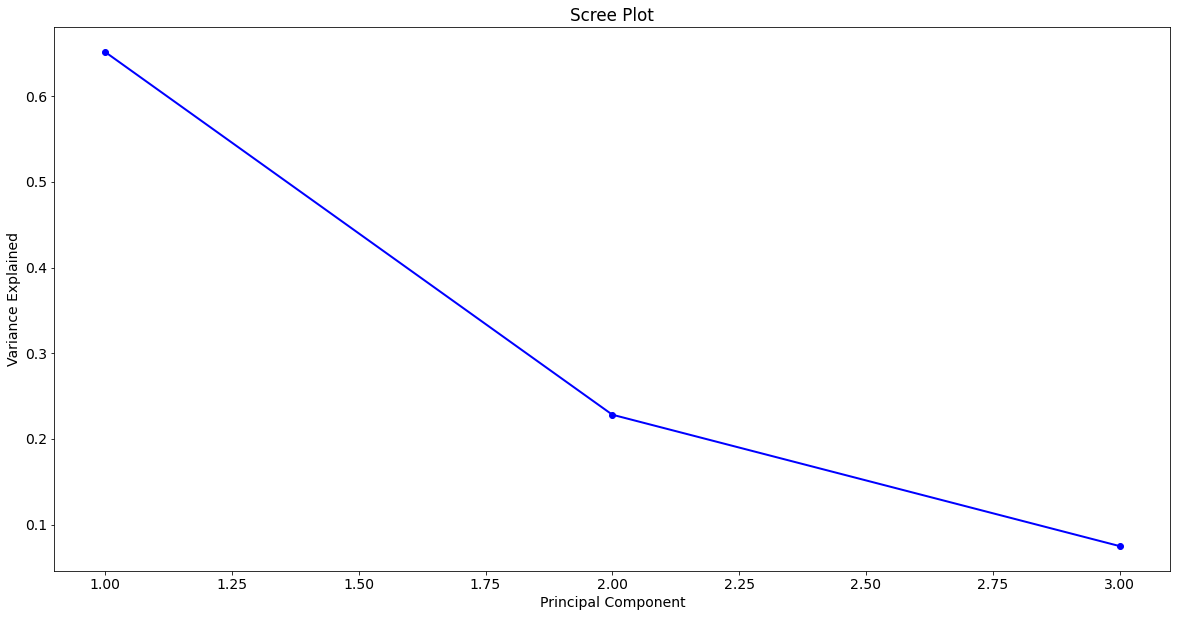

array([0.65157614, 0.2282931 , 0.07500377])

In [ ]:
pca_reduce3 = PCA(n_components = 'mle')
pca_reduce3.fit(data_reduce_scaled3[data_reduce_scaled3.columns[:-1]])

fig, ax = plt.subplots(figsize=(20,10))
PC_values = np.arange(pca_reduce3.n_components_) + 1
plt.plot(PC_values, pca_reduce3.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

pca_reduce3.explained_variance_ratio_

In [ ]:
pca_reduce_data3= pca_reduce3.transform(data_reduce_scaled3[data_reduce_scaled3.columns[:-1]])
pca_reduce_data3 = pd.DataFrame(data = pca_reduce_data3, columns = ['PC 1', 'PC 2', 'PC 3'])
pca_reduce_data3['class'] = data_reduce_scaled3['class']
pca_reduce_data3

,PC 1,PC 2,PC 3,class
0,-0.508688,-0.879026,0.279004,1
1,-0.817951,0.390021,0.247138,1
2,-0.596375,-0.394783,0.271046,1
3,-0.637187,-0.393240,0.277332,1
4,-0.917538,0.743197,0.237645,1
...,...,...,...,...
5468,0.250736,-0.980202,0.484466,2
5469,-0.899532,0.658774,0.249835,1
5470,-0.322825,0.670619,-0.099488,1
5471,-0.486918,-0.017396,0.126950,1


In [ ]:
map_color={
    1:'red',
    2:'blue',
    3:'green',
    4:'black',
    5:'orange'
}

pca_reduce_data3['color'] = pca_reduce_data3['class'].map(map_color)

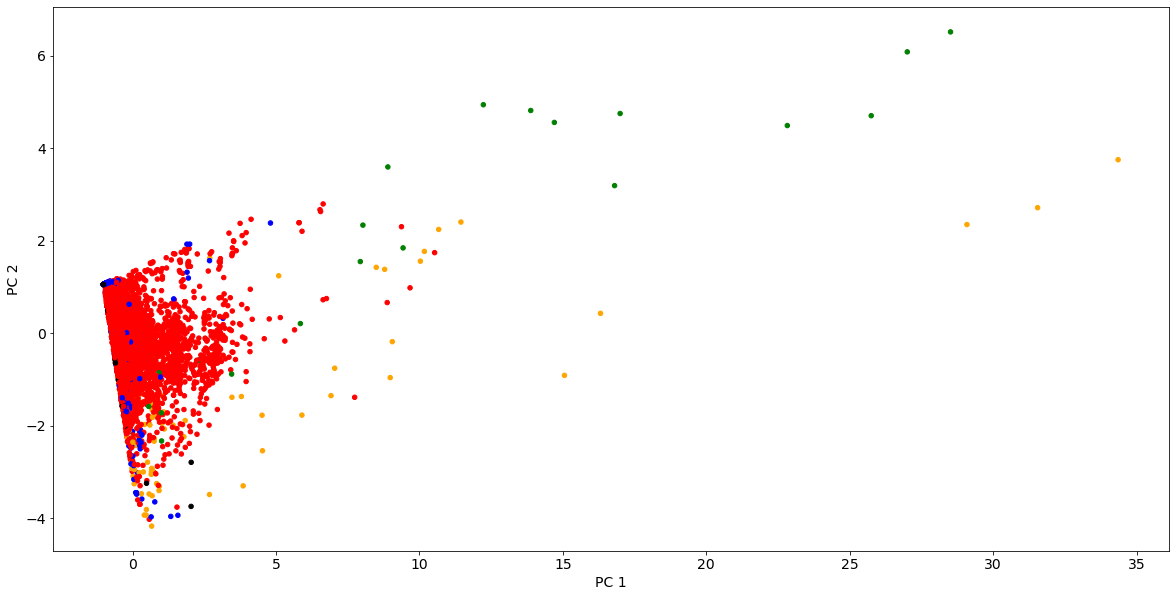

In [ ]:
pca_reduce_data3.plot.scatter(x='PC 1', y='PC 2',c='color',figsize=(20,10))

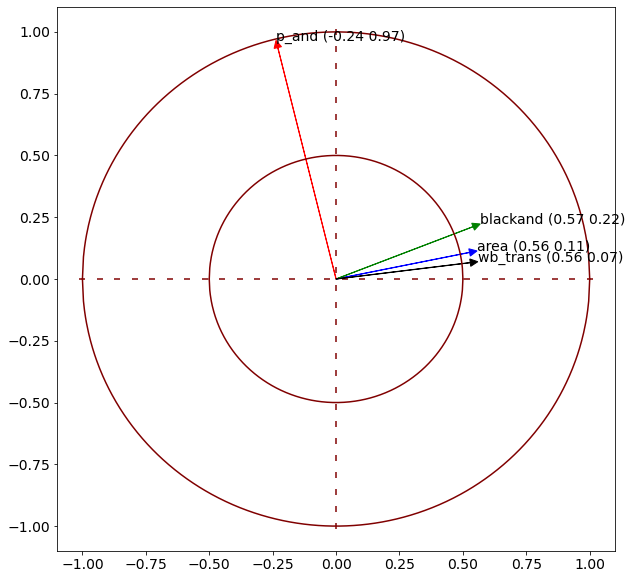

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})

#Plot circle
#Create a list of 500 points with equal spacing between -1 and 1
x=np.linspace(start=-1,stop=1,num=500)
#Find y1 and y2 for these points
y_positive=lambda x: np.sqrt(1-x**2) 
y_negative=lambda x: -np.sqrt(1-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Plot smaller circle
x=np.linspace(start=-0.5,stop=0.5,num=500)
y_positive=lambda x: np.sqrt(0.5**2-x**2) 
y_negative=lambda x: -np.sqrt(0.5**2-x**2)
plt.plot(x,list(map(y_positive, x)), color='maroon')
plt.plot(x,list(map(y_negative, x)),color='maroon')

#Create broken lines
x=np.linspace(start=-1,stop=1,num=30)
plt.scatter(x,[0]*len(x), marker='_',color='maroon')
plt.scatter([0]*len(x), x, marker='|',color='maroon')

#Define color list
colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
if len(pca_reduce2.components_[0]) > 6:
    colors=colors*(int(len(pca_reduce3.components_[0])/6)+1)

add_string=""
for i in range(len(pca_reduce3.components_[0])):
    xi=pca_reduce3.components_[0][i]
    yi=pca_reduce3.components_[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.03, head_length=0.03, 
              color=colors[i], length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca_reduce3.components_[0, i], 
             pca_reduce3.components_[1, i] , 
             s=data_reduce_scaled3.columns[i] + add_string )

# **Applications de Modèles** 


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data_scaled[data_scaled.columns[:-1]]
y =  data_scaled[data_scaled.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3666, 10)
(1807, 10)
(3666,)
(1807,)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def test_hyperparametres(algo, parameters,X_train,Y_train):
    random.seed(1234)
    grid = GridSearchCV(algo, parameters, n_jobs=-1, cv = 5)
    grid.fit(X_train, Y_train)
    print(grid.best_score_, grid.best_estimator_)
    return grid.best_score_, grid.best_estimator_

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix

SVC


In [ ]:
from sklearn.svm import SVC

In [ ]:
random.seed(1234)

svc = SVC()

svc.fit(x_train,y_train)

y_pred_svc = svc.predict(x_test)
print(y_pred_svc)
precision_score(y_test, y_pred_svc, average='micro')

[1 1 1 ... 4 5 1]


0.9529607083563918

In [ ]:
parameters = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'C' : [0.5,1,1.5],
              'degree' : [2, 3, 4],
              'shrinking' : [False, True],
              'decision_function_shape' : ['ovo', 'ovr']}
test_hyperparametres(SVC(),parameters,x_train, y_train)

0.9650839556746751 SVC(C=0.5, decision_function_shape='ovo', degree=2, kernel='linear',
    shrinking=False)


(0.9650839556746751,
 SVC(C=0.5, decision_function_shape='ovo', degree=2, kernel='linear',
     shrinking=False))

Test avec optimisation Grid

In [ ]:
random.seed(1234)

svc = SVC(C=1.5, decision_function_shape='ovo', degree=2, shrinking=False)

svc.fit(x_train,y_train)

y_pred_svc = svc.predict(x_test)
print(y_pred_svc)
precision_score(y_test, y_pred_svc, average='micro')

[1 1 1 ... 4 5 1]


0.9557277255118982

In [ ]:
confusion_matrix(y_test, y_pred_svc)

array([[1596,    8,    2,    4,    2],
       [  27,   89,    0,    2,    0],
       [   8,    0,    0,    0,    0],
       [   4,    0,    0,   24,    0],
       [  22,    0,    0,    1,   18]])

KNeighbors



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random.seed(1234)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)
precision_score(y_test, y_pred_knn, average='micro')

0.961261759822911

In [ ]:
parameters = {'n_neighbors' : [1,2,3,4,5],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto','ball_tree','kd_tree','brute'],
              'metric' : ['euclidean','manhattan','minkowski']}
test_hyperparametres(KNeighborsClassifier(),parameters,x_train, y_train)

0.9699941638074281 KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


(0.9699941638074281,
 KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance'))

In [ ]:
random.seed(1234)

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)
precision_score(y_test, y_pred_knn, average='micro')

0.9629219701162147

In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[1590,    9,    3,    3,    7],
       [  19,   95,    0,    2,    2],
       [   0,    0,    8,    0,    0],
       [   4,    0,    0,   24,    0],
       [  16,    1,    0,    1,   23]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random.seed(1234)

rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)
precision_score(y_test, y_pred_rfc, average='micro')

[1 1 1 ... 4 5 1]


0.965688987271721

In [ ]:
parameters = {'n_estimators' : [50,100,150],
              'criterion' : ['gini','entropy'],
              'bootstrap' : [True, False],
              'min_weight_fraction_leaf' : [0,0.1,0.25,0.5],
              'max_features' : ['auto', 'sqrt', 'log2']}

test_hyperparametres(RandomForestClassifier(),parameters,x_train, y_train)

0.9776325131686067 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_weight_fraction_leaf=0, n_estimators=150)


(0.9776325131686067,
 RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        min_weight_fraction_leaf=0, n_estimators=150))

In [ ]:
random.seed(1234)

rfc =  RandomForestClassifier(criterion='entropy', max_features='sqrt',
                        min_weight_fraction_leaf=0, n_estimators=150)

rfc.fit(x_train,y_train)

y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)
precision_score(y_test, y_pred_rfc, average='micro')

[1 1 1 ... 4 5 1]


0.96956281128943

In [ ]:
confusion_matrix(y_test, y_pred_rfc)

array([[1593,    7,    2,    4,    6],
       [  14,   99,    0,    3,    2],
       [   0,    0,    8,    0,    0],
       [   1,    0,    0,   27,    0],
       [  14,    1,    0,    1,   25]])

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
random.seed(1234)
bc = BaggingClassifier()

bc.fit(x_train,y_train)

y_pred_bc = bc.predict(x_test)
print(y_pred_bc)
precision_score(y_test, y_pred_bc, average='micro')

[1 1 1 ... 4 5 1]


0.961261759822911

In [ ]:
parameters = {'n_estimators' : [5,10,25],
              'bootstrap' : [True, False],
          'max_features' : [1,2,3,5]}
test_hyperparametres(BaggingClassifier(),parameters,x_train, y_train)

0.9754511897283011 BaggingClassifier(bootstrap=False, max_features=5, n_estimators=25)


(0.9754511897283011,
 BaggingClassifier(bootstrap=False, max_features=5, n_estimators=25))

In [ ]:
random.seed(1234)

bc = BaggingClassifier(bootstrap=False, max_features=5, n_estimators=25)

bc.fit(x_train,y_train)

y_pred_bc = bc.predict(x_test)
print(y_pred_bc)
precision_score(y_test, y_pred_bc, average='micro')

[1 1 1 ... 4 5 1]


0.9673491975650249

In [ ]:
confusion_matrix(y_test, y_pred_bc)

array([[1593,    6,    2,    6,    5],
       [  15,   98,    0,    3,    2],
       [   0,    0,    8,    0,    0],
       [   1,    0,    0,   27,    0],
       [  17,    0,    0,    2,   22]])

## Avec PCA2


In [ ]:
x_pca1 = data_reduce_scaled[data_reduce_scaled.columns[:-1]]
y_pca1 =  data_reduce_scaled[data_reduce_scaled.columns[-1]]
x_pca1_train, x_pca1_test, y_pca1_train, y_pca1_test = train_test_split(x_pca1, y_pca1, test_size=0.33)
print(x_pca1_train.shape)
print(x_pca1_test.shape)
print(y_pca1_train.shape)
print(y_pca1_test.shape)

(3666, 8)
(1807, 8)
(3666,)
(1807,)


In [ ]:
random.seed(1234)
rfc = RandomForestClassifier()

rfc.fit(x_pca1_train,y_pca1_train)

y_pred_rfc = rfc.predict(x_pca1_test)
print(y_pred_rfc)
precision_score(y_pca1_test, y_pred_rfc, average='micro')

[1 1 1 ... 1 1 1]


0.9739900387382402

In [ ]:
parameters = {'n_estimators' : [50,100,150],
              'criterion' : ['gini','entropy'],
              'bootstrap' : [True, False],
              'min_weight_fraction_leaf' : [0,0.1,0.25,0.5],
              'max_features' : ['auto', 'sqrt', 'log2']}

test_hyperparametres(RandomForestClassifier(),parameters,x_pca1_train,y_pca1_train)

0.9691759816513079 RandomForestClassifier(criterion='entropy', min_weight_fraction_leaf=0,
                       n_estimators=150)


(0.9691759816513079,
 RandomForestClassifier(criterion='entropy', min_weight_fraction_leaf=0,
                        n_estimators=150))

In [ ]:
random.seed(1234)

rfc = RandomForestClassifier(criterion='entropy', max_features='log2',
                        min_weight_fraction_leaf=0, n_estimators=150)

rfc.fit(x_pca1_train,y_pca1_train)

y_pred_rfc = rfc.predict(x_pca1_test)
print(y_pred_rfc)
precision_score(y_pca1_test, y_pred_rfc, average='micro')

[1 1 1 ... 1 1 1]


0.9750968456004427

In [ ]:
x_pca2 = data_reduce_scaled2[data_reduce_scaled2.columns[:-1]]
y_pca2 =  data_reduce_scaled2[data_reduce_scaled2.columns[-1]]
x_pca2_train, x_pca2_test, y_pca2_train, y_pca2_test = train_test_split(x_pca2, y_pca2, test_size=0.33)
print(x_pca2_train.shape)
print(x_pca2_test.shape)
print(y_pca2_train.shape)
print(y_pca2_test.shape)

(3666, 6)
(1807, 6)
(3666,)
(1807,)


In [ ]:
random.seed(1234)

rfc = RandomForestClassifier()

rfc.fit(x_pca2_train,y_pca2_train)

y_pred_rfc = rfc.predict(x_pca2_test)
print(y_pred_rfc)
precision_score(y_pca2_test, y_pred_rfc, average='micro')

[4 1 1 ... 1 1 1]


0.9590481460985059

In [ ]:
test_hyperparametres(RandomForestClassifier(),parameters,x_pca2_train,y_pca2_train)

0.9612636657980529 RandomForestClassifier(criterion='entropy', min_weight_fraction_leaf=0)


(0.9612636657980529,
 RandomForestClassifier(criterion='entropy', min_weight_fraction_leaf=0))

In [ ]:
random.seed(1234)

rfc =  RandomForestClassifier(criterion='entropy', max_features='log2',
                        min_weight_fraction_leaf=0)

rfc.fit(x_pca2_train,y_pca2_train)

y_pred_rfc = rfc.predict(x_pca2_test)
print(y_pred_rfc)
precision_score(y_pca2_test, y_pred_rfc, average='micro')

[4 1 1 ... 1 1 1]


0.9623685666851135

In [ ]:
x_pca3 = data_reduce_scaled3[data_reduce_scaled3.columns[:-1]]
y_pca3 =  data_reduce_scaled3[data_reduce_scaled3.columns[-1]]
x_pca3_train, x_pca3_test, y_pca3_train, y_pca3_test = train_test_split(x_pca3, y_pca3, test_size=0.33)
print(x_pca3_train.shape)
print(x_pca3_test.shape)
print(y_pca3_train.shape)
print(y_pca3_test.shape)

(3666, 4)
(1807, 4)
(3666,)
(1807,)


In [ ]:
random.seed(1234)

rfc = RandomForestClassifier()

rfc.fit(x_pca3_train,y_pca3_train)

y_pred_rfc = rfc.predict(x_pca3_test)
print(y_pred_rfc)
precision_score(y_pca3_test, y_pred_rfc, average='micro')

[1 5 2 ... 1 1 1]


0.9330381848367459

In [ ]:
test_hyperparametres(RandomForestClassifier(),parameters,x_pca3_train,y_pca3_train)

0.9288066287252195 RandomForestClassifier(min_weight_fraction_leaf=0, n_estimators=150)


(0.9288066287252195,
 RandomForestClassifier(min_weight_fraction_leaf=0, n_estimators=150))

In [ ]:
random.seed(1234)

rfc = RandomForestClassifier(criterion='entropy', max_features='log2',
                        min_weight_fraction_leaf=0, n_estimators=150)

rfc.fit(x_pca3_train,y_pca3_train)

y_pred_rfc = rfc.predict(x_pca3_test)
print(y_pred_rfc)
precision_score(y_pca3_test, y_pred_rfc, average='micro')

[1 5 2 ... 1 1 1]


0.9324847814056447

Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
random.seed(1234)
rfc_pca1 = RandomForestClassifier(criterion='entropy', max_features='log2',
                        min_weight_fraction_leaf=0, n_estimators=150)
train_sizes, train_scores, test_scores = learning_curve(estimator = rfc_pca1, X=x_pca1, y = y_pca1,train_sizes=np.linspace(0.1, 1.0, 10))

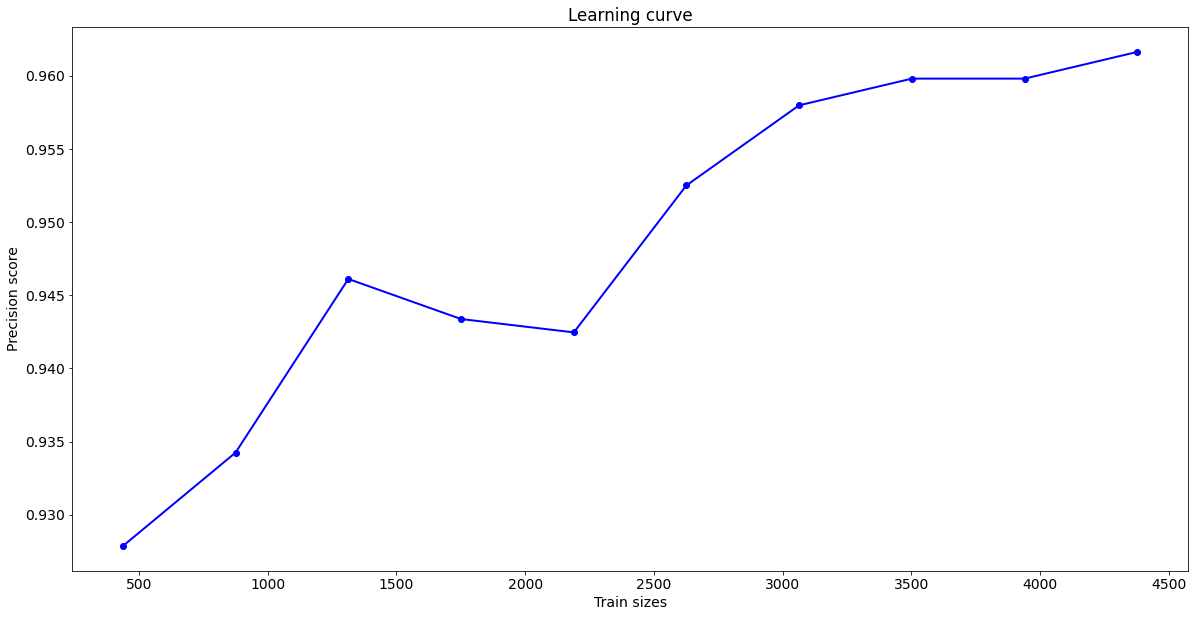

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(train_sizes, test_scores[:,0], 'o-', linewidth=2, color='blue')
plt.title('Learning curve')
plt.xlabel('Train sizes')
plt.ylabel('Precision score')
plt.show()

